# **Proyek Analisis Data: E-Commerce Public Dataset**
*   **Nama:** Dimas Ari Lumintang
*   **Email:** dimasarilumintang10.4@gmail.com
* **ID Dicoding:** @arilumintang



**LIBRARY**

In [1]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 10.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import unidecode
import matplotlib.image as mpimg

# **Pertanyaan Bisnis**

1. Produk apa yang paling banyak dan paling sedikit terjual?
2. Bagaimana performa penjualan E-Commerce?
3. Bagaimana tingkat kepuasan customer?
4. Bagiama persebaran posisi customer berdasarkan letak geografisnya?

# **DATA WRANGLING**

Pengumpulan data (Gathering data), penilaian data (Assessing data), serta pembersihan data (Cleaning data)

### **Gathering Data**

In [3]:
customers_df = pd.read_csv("/content/customers_dataset.csv")
orders_df = pd.read_csv("/content/orders_dataset.csv")
products_df = pd.read_csv("/content/products_dataset.csv")
sellers_df = pd.read_csv("/content/sellers_dataset.csv")
items_df = pd.read_csv("/content/order_items_dataset.csv")
reviews_df = pd.read_csv("/content/order_reviews_dataset.csv")
payments_df = pd.read_csv("/content/order_payments_dataset.csv")
category_df = pd.read_csv("/content/product_category_name_translation.csv")
geolocation_df = pd.read_csv("/content/geolocation_dataset.csv")

In [4]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [8]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight**
* Dataset ini terdiri dari 9 dataset.
* Tiap dataset memiliki fungsi untuk analisa masing-masing, contohnya geolocation_dataset yang berisi latitude-longitude, berguna untuk menentukan titik lokasi.

### **Assessing Data**

**Informasi Umum**

**.info()**, berfungsi untuk melihat informasi umum mengenai dataframe yang digunakan.

In [13]:
print('\n', customers_df.info())
print("\n=====================================\n")
print('\n', orders_df.info())
print("\n=====================================\n")
print('\n', products_df.info())
print("\n=====================================\n")
print('\n', sellers_df.info())
print("\n=====================================\n")
print('\n', items_df.info())
print("\n=====================================\n")
print('\n', reviews_df.info())
print("\n=====================================\n")
print('\n', payments_df.info())
print("\n=====================================\n")
print('\n', category_df.info())
print("\n=====================================\n")
print('\n', geolocation_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  

**.describe()**, digunakan untuk menghasilkan ringkasan statistik dari data numerik dalam DataFrame atau Series. Fungsi ini memberikan informasi umum mengenai distribusi data, seperti nilai mean, standard deviation, minimum, maximum, serta kuartil (percentiles) data.

In [14]:
print("\nDescribe data customer:\n", customers_df.describe())
print("\nDescribe data order:\n", orders_df.describe())
print("\nDescribe data product:\n", products_df.describe())
print("\nDescribe data seller:\n", sellers_df.describe())
print("\nDescribe data item:\n", items_df.describe())
print("\nDescribe data review:\n", reviews_df.describe())
print("\nDescribe data payment:\n", payments_df.describe())
print("\nDescribe data category:\n", category_df.describe())
print("\nDescribe data geolocation:\n", geolocation_df.describe())


Describe data customer:
        customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

Describe data order:
                                 order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10

**Cek Missing Value**

**.isnull()**, berfungsi untuk memeriksa apakah ada nilai missing (null) atau tidak pada sebuah objek DataFrame atau Series.

**.sum()**, berfungsi untuk menjumlahkan nilai-nilai dalam sebuah objek DataFrame atau Series

In [15]:
print('\nMissing value data customer:\n', customers_df.isnull().sum())
print('\nMissing value data order:\n', orders_df.isnull().sum())
print('\nMissing value data product:\n', products_df.isnull().sum())
print('\nMissing value data seller:\n', sellers_df.isnull().sum())
print('\nMissing value data item:\n', items_df.isnull().sum())
print('\nMissing value data review:\n', reviews_df.isnull().sum())
print('\nMissing value data payment:\n', payments_df.isnull().sum())
print('\nMissing value data category:\n', category_df.isnull().sum())
print('\nMissing value data geolocation:\n', geolocation_df.isnull().sum())


Missing value data customer:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Missing value data order:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Missing value data product:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Missing value data seller:
 seller_id                 0
seller_zip_code_prefix    0
seller_city               0

**Cek Duplicate Value**

In [16]:
print('Info data duplikat customers:', customers_df.duplicated().sum())
print('Info data duplikat orders:', orders_df.duplicated().sum())
print('Info data duplikat products:', products_df.duplicated().sum())
print('Info data duplikat sellers:', sellers_df.duplicated().sum())
print('Info data duplikat items:', items_df.duplicated().sum())
print('Info data duplikat reviews:', reviews_df.duplicated().sum())
print('Info data duplikat payments:', payments_df.duplicated().sum())
print('Info data duplikat category:', category_df.duplicated().sum())
print('Info data duplikat geolocation:', geolocation_df.duplicated().sum())

Info data duplikat customers: 0
Info data duplikat orders: 0
Info data duplikat products: 0
Info data duplikat sellers: 0
Info data duplikat items: 0
Info data duplikat reviews: 0
Info data duplikat payments: 0
Info data duplikat category: 0
Info data duplikat geolocation: 261831


**Insight**
* Data duplicate hanya ada di dataset geolocation_dataset. Namun karena datanya berupa latitude-longitude, maka normal terdapat duplicate data.
* Missing value terdapat di dataset oders_dataset, products_dataset, dan order_reviews_dataset. Ketiga data ini perlu dicek apakah datanya dapat didrop atau harus diisi dengan nilai yang lain agar hasilnya lebih baik.

### **Cleaning Data**

**Duplicate Value**

*Duplicate value* hanya ada di *geolocation_dataset*, data pada *geolocation_dataset* wajar memiliki nilai yang *duplicate*. Karena data yang *duplicate* ini adalah data kota, sehingga wajar terdapat *duplicate*. Dalam kasus ini contohnya adalah 3 kota dengan *duplicate* paling banyak, yaitu:
1. Sao Paulo (SP)
2. Rio de Janeiro (AC, RJ)
3. Belo Horizonte (MG)

Jadi, untuk *data duplicate* bisa dibiarkan seperti aslinya.

**Missing Value**

Missing value terdapat di *orders_dataset*, *products_dataset*, dan *order_reviews_dataset*.

* **products_dataset** nilai missing-nya tidak perlu dihapus karena dari kolom product_id tidak ada nilai yang missing. Bisa jadi kolom product_category_name,	product_name_lenght,	product_description_lenght, dan product_photos_qty tidak terinput dengan baik namun wujud productnya ada berdasarkan nilai product_id.
* **orders_dataset** nilai missing-nya tidak perlu dihapus karena dari kolom yang kosong ini adalah kolom yang date/time yang mencatat tanggal dan waktu tiap tahapan proses pengiriman barang. Baris yang kosong di kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date dikarenakan proses pengiriman barang belum selesai pada tahapan kolom tersebut. Sehingga tanggal dan waktunya belum tercatat.

In [28]:
datetime_1 = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_1:
  orders_df[column] = pd.to_datetime(orders_df[column])

datetime_2 = ["shipping_limit_date"]

for column in datetime_2:
  items_df[column] = pd.to_datetime(items_df[column])

datetime_3 = ["review_creation_date","review_answer_timestamp"]

for column in datetime_3:
  reviews_df[column] = pd.to_datetime(reviews_df[column])

In [18]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [19]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [29]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [30]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [31]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [32]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


* **order_reviews_dataset** nilai kosongnya akan diisi dengan nilai lain, dalam hal ini adalah string "There is no comments", karena jika datanya dihapus/drop, maka seolah-olah tidak ada review dari order_id yang ada. Karena barisnya telah didrop. Sehingga, langkah paling bijak adalah mengubah nilai missing valuenya.

In [24]:
reviews_df[reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [34]:
reviews_df.fillna(value="There is no comments", inplace=True)

In [36]:
reviews_df.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


# **Exploratory Data Analysis (EDA)**

In [37]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


5 asal kota customer paling banyak secara berturut-turut berasal dari Sao Paulo, Rio de Janeiro, Belo Horizonte, Brasilia, dan Curitiba.

In [38]:
payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


Tipe pembayaran para customer paling banyak adalah menggunakan kartu kredit

<Axes: >

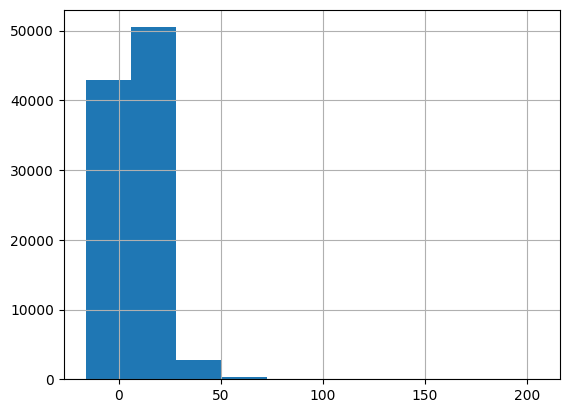

In [42]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

orders_df.delivery_time.hist()

In [46]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time_days"] = round(delivery_time / 86400)

In [53]:
average_delivery_time = orders_df["delivery_time_days"].mean()
print("Rata-rata waktu pengiriman (dalam hari):", average_delivery_time)

Rata-rata waktu pengiriman (dalam hari): 9.292314071002851


* Waktu paling lama dalam pengiriman adalah 50 ribu detik atau sekitar 13 jam.
* Rata-rata lama pengiriman adalah 9 setengah hari

**Merge orders_df & customers_df**

In [57]:
orders_cust_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_cust_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_time_days
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1 days 23:47:38,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,13 days 19:26:20,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3 days 03:27:51,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,0 days 16:41:43,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10 days 05:39:48,10.0


**Merge payments_df & reviews_df**

In [58]:
payrev_df = pd.merge(
    left=payments_df,
    right=reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payrev_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no comment,no comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,no comment,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no comment,no comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no comment,no comment,2017-12-21,2017-12-22 01:10:39


In [59]:
payrev_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

Total paling kecil dan besar dari data masing-masing metode pembayaran

**Merge orders_cust_df & payrev_df**

In [60]:
customers_df = pd.merge(
    left=orders_cust_df,
    right=payrev_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,no comment,no comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,no comment,no comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,no comment,no comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,no comment,no comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


**Merge items_df & sellers_df**

In [61]:
item_seller_df = pd.merge(
    left=items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


**Merge products_df & category_df**

In [62]:
prod_cat_df = pd.merge(
    left=products_df,
    right=category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
prod_cat_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [63]:
prod_cat_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head()

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335


5 kategori produk yang paling banyak ditransaksikan

**Merge seller_df & prod_cat_df**

In [64]:
selprod_df = pd.merge(
    left=prod_cat_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
selprod_df.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [65]:
selprod_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

Total transaksi paling kecil dan besar dari data masing-masing kategori item

**Merge All Dataset**

In [72]:
all_data = pd.merge(
    left=customers_df,
    right=selprod_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [73]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    119143 non-null  object         
 1   customer_unique_id             119143 non-null  object         
 2   customer_zip_code_prefix       119143 non-null  int64          
 3   customer_city                  119143 non-null  object         
 4   customer_state                 119143 non-null  object         
 5   order_id                       119143 non-null  object         
 6   order_status                   119143 non-null  object         
 7   order_purchase_timestamp       119143 non-null  datetime64[ns] 
 8   order_approved_at              118966 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns] 
 10  order_delivered_customer_date  115722 non-null  datetime

**Explore geolocation_df**

In [66]:
geolocation_df.sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
785897,71746,-15.946030,-47.970227,brasilia,DF
356266,15895,-20.915914,-49.263490,cedral,SP
469061,24040,-22.882486,-43.125469,niteroi,RJ
488007,25685,-22.509048,-43.182284,petropolis,RJ
885053,86010,-23.315598,-51.157614,londrina,PR
140778,5782,-23.650268,-46.769190,sao paulo,SP
904048,88020,-27.600460,-48.544212,florianopolis,SC
552816,30512,-19.948830,-44.004592,belo horizonte,MG
226089,9361,-23.697518,-46.457711,maua,SP
544643,30150,-19.919839,-43.930519,belo horizonte,MG


In [67]:
def pretty_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [68]:
geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].apply(pretty_string)
geolocation_df.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,
24220,1146
24230,1102
38400,965
35500,907
11680,879
...,...
20056,1
76370,1
63012,1


In [69]:
geolocation_df[geolocation_df['geolocation_zip_code_prefix'] == 24220].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470805,24220,-22.905817,-43.106989,niteroi,RJ
470811,24220,-22.902306,-43.112545,niteroi,RJ
470812,24220,-22.904567,-43.110491,niteroi,RJ
470820,24220,-22.902575,-43.109192,niteroi,RJ
470821,24220,-22.907500,-43.106170,niteroi,RJ


# **Visualization & Explanatory Analysis**

**Pertanyaan 1: Produk apa yang paling banyak dan paling sedikit terjual?**

In [74]:
sum_order_items_df = all_data.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_items_df = sum_order_items_df.rename(columns={"product_id": "products"})
sum_order_items_df = sum_order_items_df.sort_values(by="products", ascending=False)
sum_order_items_df = sum_order_items_df.head(10)

sum_order_items_df.head()

,product_category_name_english,products
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150


<ipython-input-77-5c124cb6515f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-77-5c124cb6515f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


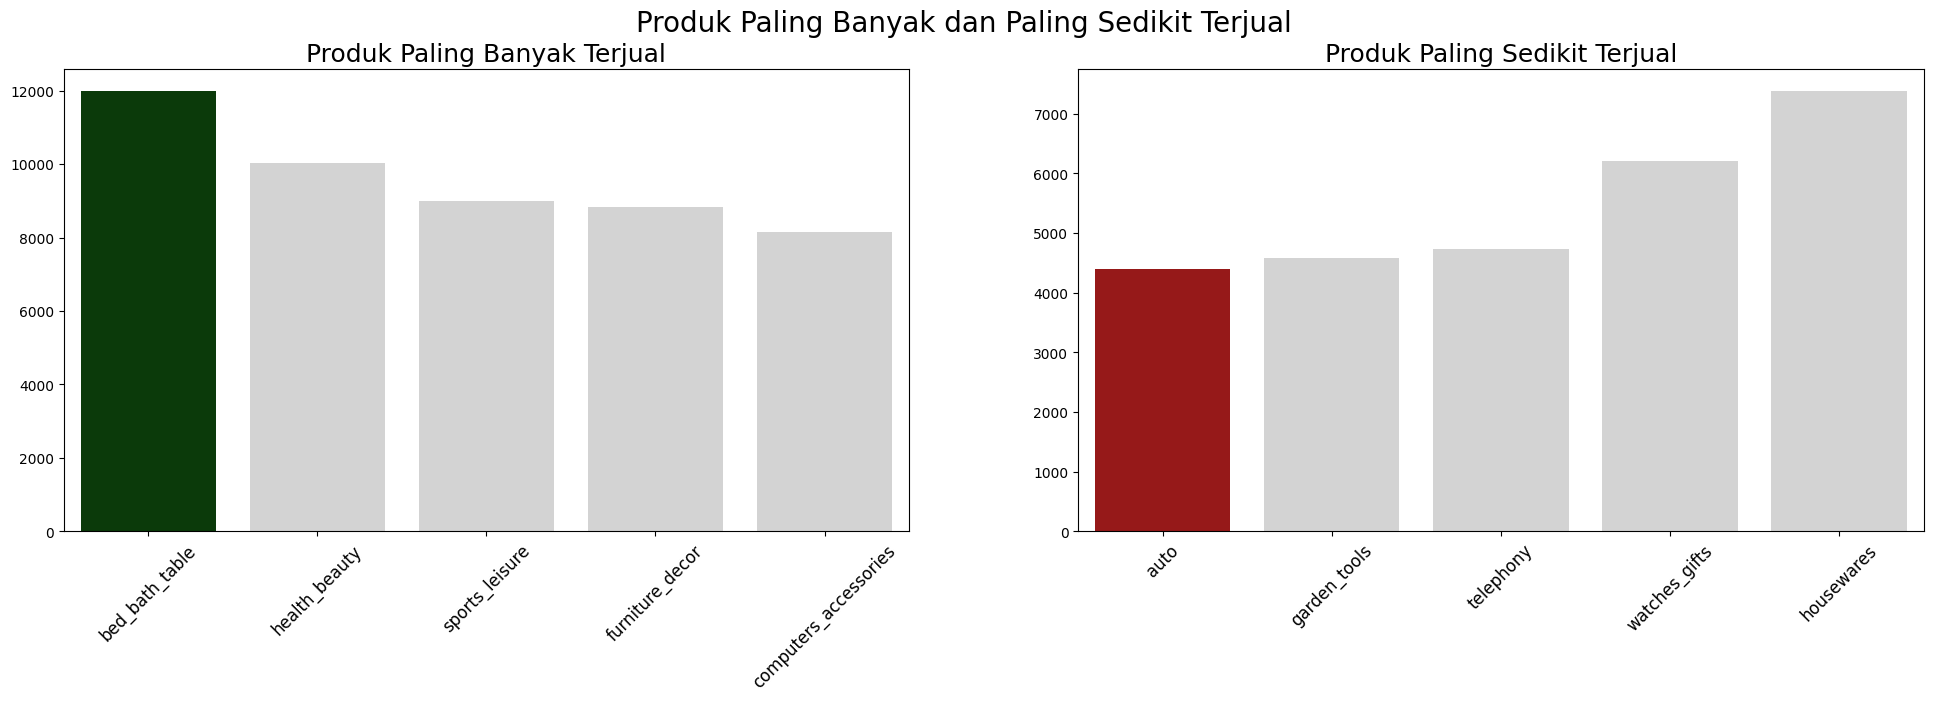

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors_highest = ["#034202", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors_lowest = ["#AB0404", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Diagram batang untuk produk paling banyak terjual
sns.barplot(
    x="product_category_name_english",
    y="products",
    data=sum_order_items_df.head(5),
    palette=colors_highest,
    ax=ax[0]
)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title("Produk Paling Banyak Terjual", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelrotation=45, labelsize=12)

# Diagram batang untuk produk paling sedikit terjual
sns.barplot(
    x="product_category_name_english",
    y="products",
    data=sum_order_items_df.sort_values(by="products", ascending=True).head(5),
    palette=colors_lowest,
    ax=ax[1]
)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_title("Produk Paling Sedikit Terjual", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelrotation=45, labelsize=12)

plt.suptitle("Produk Paling Banyak dan Paling Sedikit Terjual", fontsize=20)
plt.show()


Produk paling banyak terjual adalah **bed_bath_table**, sedangkan yang paling sedikit adalah **auto**

**Pertanyaan 2: Bagaimana performa penjualan E-Commerce?**

<ipython-input-99-145548f3c9b8>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = data_2017.resample(rule='M', on='order_approved_at').agg({


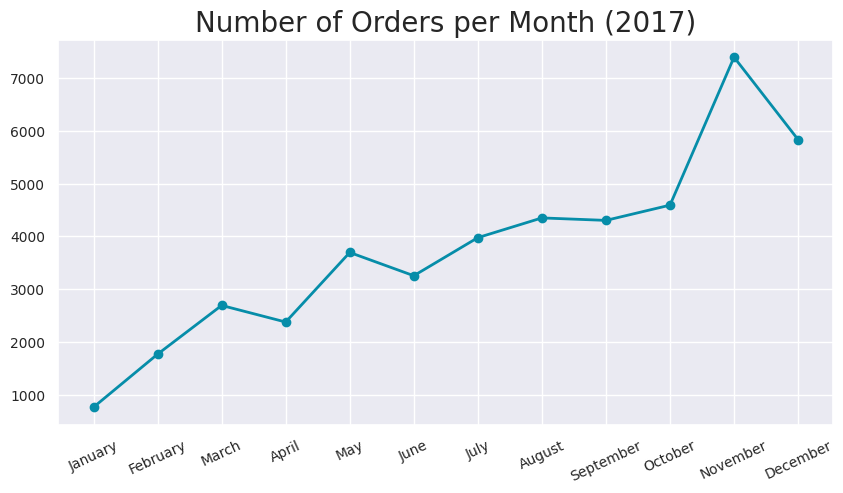

In [99]:
all_data['order_approved_at'] = pd.to_datetime(all_data['order_approved_at'])

data_2017 = all_data[all_data['order_approved_at'].dt.year == 2017]

monthly_df = data_2017.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
})
monthly_df.index = monthly_df.index.strftime('%B')  # Ubah index menjadi nama bulan
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    "order_id": "order_count",
    "order_approved_at": "month"
}, inplace=True)

monthly_df = monthly_df.sort_values('order_count').drop_duplicates('month', keep='last')

month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}
monthly_df["month_numeric"] = monthly_df["month"].map(month_mapping)

monthly_df = monthly_df.sort_values("month_numeric")
monthly_df = monthly_df.drop("month_numeric", axis=1)

plt.figure(figsize=(10, 5))
plt.plot(
    monthly_df["month"],
    monthly_df["order_count"],
    marker='o',
    linewidth=2,
    color="#068DA9"
)
plt.title("Number of Orders per Month (2017)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()


<ipython-input-100-87858661b3d0>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = all_data.resample(rule='M', on='order_approved_at').agg({


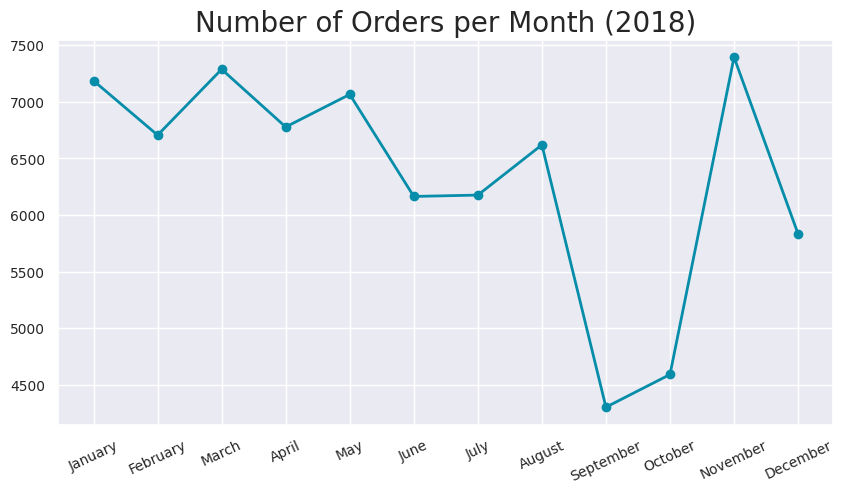

In [100]:

monthly_df = all_data.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
})
monthly_df.index = monthly_df.index.strftime('%B') #mengubah format order_approved_at menjadi Tahun-Bulan
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)

monthly_df = monthly_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')

month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

monthly_df["month_numeric"] = monthly_df["order_approved_at"].map(month_mapping)
monthly_df = monthly_df.sort_values("month_numeric")
monthly_df = monthly_df.drop("month_numeric", axis=1)

plt.figure(figsize=(10, 5))
plt.plot(
    monthly_df["order_approved_at"],
    monthly_df["order_count"],
    marker='o',
    linewidth=2,
    color="#068DA9"
)
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

* Hasil penjualan di tahun 2017 konsisten meningkat tiap bulannya, puncaknya di bulan November meningkat tajam, namun di bulan Desember menurun.
* Sedangkan penjualan di tahun 2018 terlihat stagnan dan cenderung menurun, hingga puncak penurunannya ada di bulan September hingga Oktober, namun berhasil meningkatkan penjualannya id bulan November. Tetapi kembali turun di bulan Desember.

**Pertanyaan 3: Bagaimana tingkat kepuasan customer?**

<ipython-input-79-2f39b068a3ce>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_scores.index,


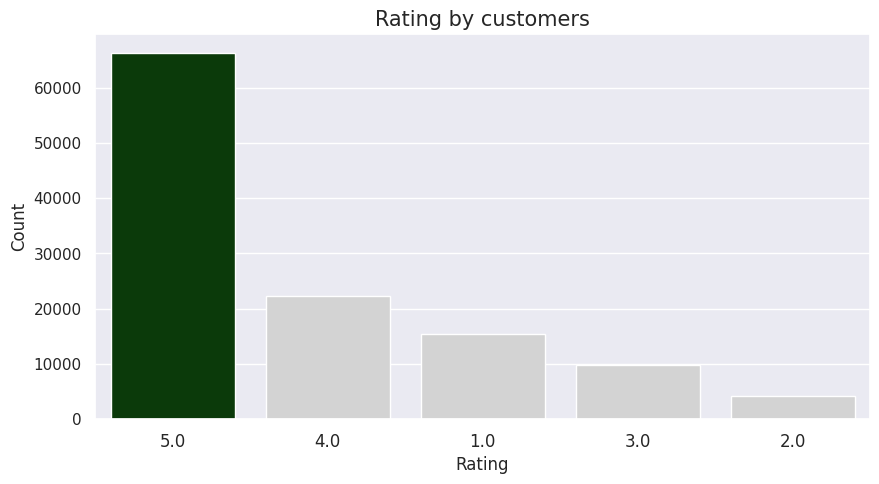

In [79]:
review_scores = all_data['review_score'].value_counts().sort_values(ascending=False)

most_common_score = review_scores.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=review_scores.index,
            y=review_scores.values,
            order=review_scores.index,
            palette=["#034202" if score == most_common_score else "#D3D3D3" for score in review_scores.index]
            )

plt.title("Rating by customers", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(fontsize=12)
plt.show()

Berdasarkan data, ternyata tingkat kepuasan customer sangat baik

**Pertanyaan 4: Bagiama persebaran posisi customer berdasarkan letak geografisnya?**

In [80]:
other_state_geolocation = geolocation_df.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

geolocation_silver = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

customers_silver = customers_df.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')


In [86]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='#034202')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()


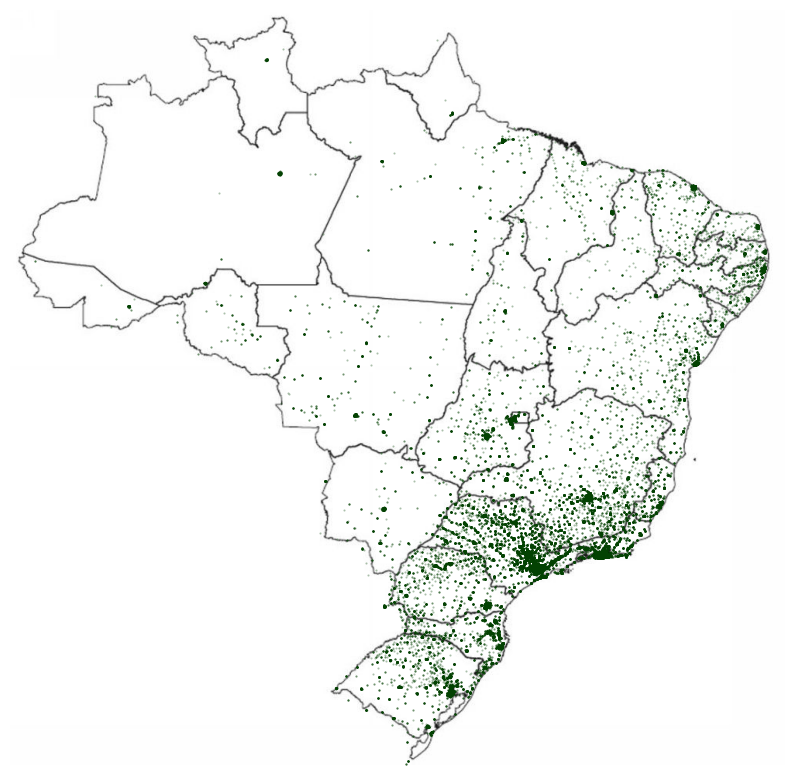

In [87]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))